In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Sanctions List - data exploration and descriptives**

*Analysis Plan:*


1.   Load data
2.   get overview of the entire file (column names, size of the df, frequencies, dtypes)
3. get number of missingness for the Designation/ Entry into Force Dates
4. Transform Dtypes
5. Filter dataframe for missing Designation entries only to decide on relevance
6. get descriptives & plot data







In [2]:
print(os.getcwd())
path = ("C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\")
os.chdir(path)
print(os.getcwd())

C:\Users\cecilianatalie.strom\GitHub\INSA\EU
C:\Users\cecilianatalie.strom\GitHub\INSA


In [3]:
df=pd.read_csv('EU/eu_sanctions_historic.csv',sep=";",low_memory=False)
df

,fileGenerationDate,Entity_LogicalId,Entity_EU_ReferenceNumber,Entity_UnitedNationId,Entity_DesignationDate,Entity_DesignationDetails,Entity_Remark,Entity_SubjectType,Entity_SubjectType_ClassificationCode,Entity_Regulation_Type,...,Citizenship_LogicalId,Citizenship_RegulationLanguage,Citizenship_Remark,Citizenship_Regulation_Type,Citizenship_Regulation_OrganisationType,Citizenship_Regulation_PublicationDate,Citizenship_Regulation_EntryIntoForceDate,Citizenship_Regulation_NumberTitle,Citizenship_Regulation_Programme,Citizenship_Regulation_PublicationUrl
0,29/11/2023,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29/11/2023,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29/11/2023,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29/11/2023,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/11/2023,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,1.0,EN,NaN,regulation,commission,2003-07-08,2003-07-07,1210/2003 (OJ L169),IRQ,http://eur-lex.europa.eu/LexUriServ/LexUriServ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30221,29/11/2023,158039,EU.10793.9,NaN,2023-05-26,UN Security Council designation,(Date of UN designation: 2023-05-26)\n(Designa...,P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30222,29/11/2023,158039,EU.10793.9,NaN,2023-05-26,UN Security Council designation,(Date of UN designation: 2023-05-26)\n(Designa...,P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30223,29/11/2023,158039,EU.10793.9,NaN,2023-05-26,UN Security Council designation,(Date of UN designation: 2023-05-26)\n(Designa...,P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30224,29/11/2023,158039,EU.10793.9,NaN,2023-05-26,UN Security Council designation,(Date of UN designation: 2023-05-26)\n(Designa...,P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape
#shows us the numer of rows & columns - 118 columns, we need to filter that!

(30226, 118)

In [5]:
#get all the missing values
is_na = df.isna().sum()
is_na

fileGenerationDate                               0
Entity_LogicalId                                 0
Entity_EU_ReferenceNumber                        0
Entity_UnitedNationId                        29420
Entity_DesignationDate                        5138
                                             ...  
Citizenship_Regulation_PublicationDate       28367
Citizenship_Regulation_EntryIntoForceDate    28367
Citizenship_Regulation_NumberTitle           28367
Citizenship_Regulation_Programme             28367
Citizenship_Regulation_PublicationUrl        28367
Length: 118, dtype: int64

In [6]:
#get the percentages of missingsness
values_list = list()
cols_list = list() #creating empty lists

for col in df.columns:
    pct_missing= np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,fileGenerationDate,0.000000
1,Entity_LogicalId,0.000000
2,Entity_EU_ReferenceNumber,0.000000
3,Entity_UnitedNationId,97.333422
4,Entity_DesignationDate,16.998610
...,...,...
113,Citizenship_Regulation_PublicationDate,93.849666
114,Citizenship_Regulation_EntryIntoForceDate,93.849666
115,Citizenship_Regulation_NumberTitle,93.849666
116,Citizenship_Regulation_Programme,93.849666


|index|col|pct\_missing|
|---|---|---|
|0|fileGenerationDate|0\.0|
|1|Entity\_LogicalId|0\.0|
|2|Entity\_EU\_ReferenceNumber|0\.0|
|3|Entity\_UnitedNationId|97\.33342155759942|
|4|Entity\_DesignationDate|16\.998610467809172|
|5|Entity\_DesignationDetails|97\.71058029511018|
|6|Entity\_Remark|11\.437173294514656|
|7|Entity\_SubjectType|0\.0|
|8|Entity\_SubjectType\_ClassificationCode|0\.0|
|9|Entity\_Regulation\_Type|0\.0|
|10|Entity\_Regulation\_OrganisationType|0\.0|
|11|Entity\_Regulation\_PublicationDate|0\.0|
|12|Entity\_Regulation\_EntryIntoForceDate|0\.0|
|13|Entity\_Regulation\_NumberTitle|0\.0|
|14|Entity\_Regulation\_Programme|0\.0|
|15|Entity\_Regulation\_PublicationUrl|0\.0|
|16|NameAlias\_LastName|80\.711969827301|
|17|NameAlias\_FirstName|80\.74505392708264|
|18|NameAlias\_MiddleName|86\.97809832594456|
|19|NameAlias\_WholeName|27\.013167471713096|
|20|NameAlias\_NameLanguage|54\.80050287831668|
|21|NameAlias\_Gender|70\.85952491232713|
|22|NameAlias\_Title|97\.85284192417124|
|23|NameAlias\_Function|88\.23860252762522|
|24|NameAlias\_LogicalId|27\.013167471713096|
|25|NameAlias\_RegulationLanguage|27\.013167471713096|
|26|NameAlias\_Remark|94\.98445047310263|
|27|NameAlias\_Regulation\_Type|27\.013167471713096|
|28|NameAlias\_Regulation\_OrganisationType|27\.013167471713096|
|29|NameAlias\_Regulation\_PublicationDate|27\.013167471713096|
|30|NameAlias\_Regulation\_EntryIntoForceDate|27\.013167471713096|
|31|NameAlias\_Regulation\_NumberTitle|27\.013167471713096|
|32|NameAlias\_Regulation\_Programme|27\.013167471713096|
|33|NameAlias\_Regulation\_PublicationUrl|27\.013167471713096|
|34|Address\_City|96\.20525375504533|
|35|Address\_Street|97\.07867398928074|
|36|Address\_PoBox|99\.77171971150665|
|37|Address\_ZipCode|99\.0306358763978|
|38|Address\_Region|99\.52358896314432|
|39|Address\_Place|99\.7948785813538|
|40|Address\_AsAtListingTime|95\.06716072255674|
|41|Address\_ContactInfo|98\.10097267253359|
|42|Address\_CountryIso2Code|95\.06716072255674|
|43|Address\_CountryDescription|95\.06716072255674|
|44|Address\_LogicalId|95\.06716072255674|
|45|Address\_RegulationLanguage|95\.06716072255674|
|46|Address\_Remark|98\.84205650764243|
|47|Address\_Regulation\_Type|95\.06716072255674|
|48|Address\_Regulation\_OrganisationType|95\.06716072255674|
|49|Address\_Regulation\_PublicationDate|95\.06716072255674|
|50|Address\_Regulation\_EntryIntoForceDate|95\.06716072255674|
|51|Address\_Regulation\_NumberTitle|95\.06716072255674|
|52|Address\_Regulation\_Programme|95\.06716072255674|
|53|Address\_Regulation\_PublicationUrl|95\.06716072255674|
|54|BirthDate\_BirthDate|91\.07060146893403|
|55|BirthDate\_Day|91\.07390987891219|
|56|BirthDate\_Month|91\.00112485939258|
|57|BirthDate\_Year|88\.66207900483028|
|58|BirthDate\_YearRangeFrom|99\.83127109111362|
|59|BirthDate\_YearRangeTo|99\.82796268113545|
|60|BirthDate\_Circa|88\.1658175081056|
|61|BirthDate\_CalendarType|88\.1658175081056|
|62|BirthDate\_ZipCode|100\.0|
|63|BirthDate\_Region|98\.91814993714021|
|64|BirthDate\_Place|98\.82882286772977|
|65|BirthDate\_City|94\.24005822801561|
|66|BirthDate\_CountryIso2Code|88\.1658175081056|
|67|BirthDate\_CountryDescription|88\.1658175081056|
|68|BirthDate\_LogicalId|88\.1658175081056|
|69|BirthDate\_RegulationLanguage|88\.1658175081056|
|70|BirthDate\_Remark|97\.9322437636472|
|71|BirthDate\_Regulation\_Type|88\.1658175081056|
|72|BirthDate\_Regulation\_OrganisationType|88\.1658175081056|
|73|BirthDate\_Regulation\_PublicationDate|88\.1658175081056|
|74|BirthDate\_Regulation\_EntryIntoForceDate|88\.1658175081056|
|75|BirthDate\_Regulation\_NumberTitle|88\.1658175081056|
|76|BirthDate\_Regulation\_Programme|88\.1658175081056|
|77|BirthDate\_Regulation\_PublicationUrl|88\.1658175081056|
|78|Identification\_Number|95\.90749685701053|
|79|Identification\_Diplomatic|95\.90749685701053|
|80|Identification\_KnownExpired|95\.90749685701053|
|81|Identification\_KnownFalse|95\.90749685701053|
|82|Identification\_ReportedLost|95\.90749685701053|
|83|Identification\_RevokedByIssuer|95\.90749685701053|
|84|Identification\_IssuedBy|99\.91398134056773|
|85|Identification\_IssuedDate|99\.26884139482564|
|86|Identification\_ValidFrom|99\.89082247072058|
|87|Identification\_ValidTo|99\.55998147290413|
|88|Identification\_LatinNumber|100\.0|
|89|Identification\_NameOnDocument|99\.97353272017469|
|90|Identification\_TypeCode|95\.90749685701053|
|91|Identification\_TypeDescription|95\.90749685701053|
|92|Identification\_Region|99\.85773837093893|
|93|Identification\_CountryIso2Code|95\.90749685701053|
|94|Identification\_CountryDescription|100\.0|
|95|Identification\_LogicalId|95\.90749685701053|
|96|Identification\_RegulationLanguage|95\.90749685701053|
|97|Identification\_Remark|97\.65764573545954|
|98|Identification\_Regulation\_Type|95\.90749685701053|
|99|Identification\_Regulation\_OrganisationType|95\.90749685701053|
|100|Identification\_Regulation\_PublicationDate|95\.90749685701053|
|101|Identification\_Regulation\_EntryIntoForceDate|95\.90749685701053|
|102|Identification\_Regulation\_NumberTitle|95\.90749685701053|
|103|Identification\_Regulation\_Programme|95\.90749685701053|
|104|Identification\_Regulation\_PublicationUrl|95\.90749685701053|
|105|Citizenship\_Region|100\.0|
|106|Citizenship\_CountryIso2Code|93\.8496658505922|
|107|Citizenship\_CountryDescription|100\.0|
|108|Citizenship\_LogicalId|93\.8496658505922|
|109|Citizenship\_RegulationLanguage|93\.8496658505922|
|110|Citizenship\_Remark|99\.91398134056773|
|111|Citizenship\_Regulation\_Type|93\.8496658505922|
|112|Citizenship\_Regulation\_OrganisationType|93\.8496658505922|
|113|Citizenship\_Regulation\_PublicationDate|93\.8496658505922|
|114|Citizenship\_Regulation\_EntryIntoForceDate|93\.8496658505922|
|115|Citizenship\_Regulation\_NumberTitle|93\.8496658505922|
|116|Citizenship\_Regulation\_Programme|93\.8496658505922|
|117|Citizenship\_Regulation\_PublicationUrl|93\.8496658505922|

In [7]:
#get a list of all columns
list1 = df.columns.to_list ()
list1

['fileGenerationDate',
 'Entity_LogicalId',
 'Entity_EU_ReferenceNumber',
 'Entity_UnitedNationId',
 'Entity_DesignationDate',
 'Entity_DesignationDetails',
 'Entity_Remark',
 'Entity_SubjectType',
 'Entity_SubjectType_ClassificationCode',
 'Entity_Regulation_Type',
 'Entity_Regulation_OrganisationType',
 'Entity_Regulation_PublicationDate',
 'Entity_Regulation_EntryIntoForceDate',
 'Entity_Regulation_NumberTitle',
 'Entity_Regulation_Programme',
 'Entity_Regulation_PublicationUrl',
 'NameAlias_LastName',
 'NameAlias_FirstName',
 'NameAlias_MiddleName',
 'NameAlias_WholeName',
 'NameAlias_NameLanguage',
 'NameAlias_Gender',
 'NameAlias_Title',
 'NameAlias_Function',
 'NameAlias_LogicalId',
 'NameAlias_RegulationLanguage',
 'NameAlias_Remark',
 'NameAlias_Regulation_Type',
 'NameAlias_Regulation_OrganisationType',
 'NameAlias_Regulation_PublicationDate',
 'NameAlias_Regulation_EntryIntoForceDate',
 'NameAlias_Regulation_NumberTitle',
 'NameAlias_Regulation_Programme',
 'NameAlias_Regula

In [8]:
#describe the individual columns
print(df["Entity_DesignationDate"].describe())
print(df["Entity_Regulation_PublicationDate"].describe())
print(df["Entity_Regulation_EntryIntoForceDate"].describe())

count          25088
unique           345
top       2022-02-23
freq            1513
Name: Entity_DesignationDate, dtype: object
count          30226
unique           303
top       2022-09-15
freq            2023
Name: Entity_Regulation_PublicationDate, dtype: object
count          30226
unique           308
top       2022-09-16
freq            2023
Name: Entity_Regulation_EntryIntoForceDate, dtype: object


In [9]:
#and get the numbers of missingness for specific variables
print(df["Entity_DesignationDate"].isnull().sum())
print(df["Entity_Regulation_PublicationDate"].isnull().sum())
print(df['Entity_Regulation_EntryIntoForceDate'].isnull().sum())

5138
0
0


we can see, that the Entity Designation Date column has 5138 missing values, lets investiagte them further

In [10]:
#first we have to check the data types and potentially transform them
df.dtypes

fileGenerationDate                           object
Entity_LogicalId                              int64
Entity_EU_ReferenceNumber                    object
Entity_UnitedNationId                        object
Entity_DesignationDate                       object
                                              ...  
Citizenship_Regulation_PublicationDate       object
Citizenship_Regulation_EntryIntoForceDate    object
Citizenship_Regulation_NumberTitle           object
Citizenship_Regulation_Programme             object
Citizenship_Regulation_PublicationUrl        object
Length: 118, dtype: object

In [11]:
#change NaN values to None
df = df.replace(np.nan,None)
#create an additional variable indicating if Entity_DesignationDate is missing or not
def test_func(df):
    """ Test Function for generating new value"""
    if df['Entity_DesignationDate'] == None :
              return 0
    else:
      return 1

df["missing_designation"] = df.apply(test_func, axis=1)
print(df)

      fileGenerationDate  Entity_LogicalId Entity_EU_ReferenceNumber  \
0             29/11/2023                13                  EU.27.28   
1             29/11/2023                13                  EU.27.28   
2             29/11/2023                13                  EU.27.28   
3             29/11/2023                13                  EU.27.28   
4             29/11/2023                13                  EU.27.28   
...                  ...               ...                       ...   
30221         29/11/2023            158039                EU.10793.9   
30222         29/11/2023            158039                EU.10793.9   
30223         29/11/2023            158039                EU.10793.9   
30224         29/11/2023            158039                EU.10793.9   
30225         29/11/2023            158039                EU.10793.9   

      Entity_UnitedNationId Entity_DesignationDate  \
0                      None                   None   
1                      None

In [12]:
df["missing_designation"].describe()

count    30226.000000
mean         0.830014
std          0.375627
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: missing_designation, dtype: float64

In [13]:
#now only show values with missing Designation date and inspect
df_missing = df.query("missing_designation == 0")
df_missing

,fileGenerationDate,Entity_LogicalId,Entity_EU_ReferenceNumber,Entity_UnitedNationId,Entity_DesignationDate,Entity_DesignationDetails,Entity_Remark,Entity_SubjectType,Entity_SubjectType_ClassificationCode,Entity_Regulation_Type,...,Citizenship_RegulationLanguage,Citizenship_Remark,Citizenship_Regulation_Type,Citizenship_Regulation_OrganisationType,Citizenship_Regulation_PublicationDate,Citizenship_Regulation_EntryIntoForceDate,Citizenship_Regulation_NumberTitle,Citizenship_Regulation_Programme,Citizenship_Regulation_PublicationUrl,missing_designation
0,29/11/2023,13,EU.27.28,None,None,None,(UNSC RESOLUTION 1483),P,person,regulation,...,None,None,None,None,None,None,None,None,None,0
1,29/11/2023,13,EU.27.28,None,None,None,(UNSC RESOLUTION 1483),P,person,regulation,...,None,None,None,None,None,None,None,None,None,0
2,29/11/2023,13,EU.27.28,None,None,None,(UNSC RESOLUTION 1483),P,person,regulation,...,None,None,None,None,None,None,None,None,None,0
3,29/11/2023,13,EU.27.28,None,None,None,(UNSC RESOLUTION 1483),P,person,regulation,...,None,None,None,None,None,None,None,None,None,0
4,29/11/2023,13,EU.27.28,None,None,None,(UNSC RESOLUTION 1483),P,person,regulation,...,EN,None,regulation,commission,2003-07-08,2003-07-07,1210/2003 (OJ L169),IRQ,http://eur-lex.europa.eu/LexUriServ/LexUriServ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,29/11/2023,157762,EU.10781.42,None,None,None,None,E,enterprise,amendment,...,None,None,None,None,None,None,None,None,None,0
30196,29/11/2023,157762,EU.10781.42,None,None,None,None,E,enterprise,amendment,...,None,None,None,None,None,None,None,None,None,0
30197,29/11/2023,157762,EU.10781.42,None,None,None,None,E,enterprise,amendment,...,None,None,None,None,None,None,None,None,None,0
30198,29/11/2023,157762,EU.10781.42,None,None,None,None,E,enterprise,amendment,...,None,None,None,None,None,None,None,None,None,0


In [14]:
#save df as separate csv files to inspect manually
df_missing.to_csv('EU/eu_missing_designation.csv')
df.to_csv('EU/eu_sanctions_complete.csv')

**Data Exploration & Visualization**

In [ ]:
'Entity_LogicalId',
 'Entity_EU_ReferenceNumber',
 'Entity_UnitedNationId',
 'Entity_DesignationDate',
 'Entity_DesignationDetails',
 'Entity_Remark',
 'Entity_SubjectType',
 'Entity_SubjectType_ClassificationCode',
 'Entity_Regulation_Type',
 'Entity_Regulation_OrganisationType',
 'Entity_Regulation_PublicationDate',
 'Entity_Regulation_EntryIntoForceDate',
 'Entity_Regulation_NumberTitle',
 'Entity_Regulation_Programme',
 'Entity_Regulation_PublicationUrl'

In [34]:
#get info on different Entity types
print(list(df.Entity_SubjectType_ClassificationCode.unique()))

#get info on different sanction regimes
print(list(df.Entity_Regulation_Programme.unique()))

#get information on the sanctioning institutions
print(list(df.Entity_Regulation_Type.unique()))

print(list(df.Entity_Regulation_OrganisationType.unique()))

['person', 'enterprise']
['IRQ', 'TERR', 'TAQA', 'AFG', 'COD', 'SDN', 'BLR', 'IRN', 'PRK', 'GIN', 'SOM', 'TUN', 'LBY', 'SYR', 'GNB', 'UKR', 'CAF', 'YEM', 'SSD', 'BDI', 'VEN', 'MMR', 'EUAQ', 'CHEM', 'ZWE', 'UNLI', 'MLI', 'NIC', 'CYB', 'TUR', 'HR', 'HTI', 'MDA']
['regulation', 'amendment', 'repealing']
['commission', 'council', 'opoce', 'un']


In [37]:
#get ALL designation dates
list1 = list(df.Entity_DesignationDate.unique())
list2 = list(df.Entity_Regulation_EntryIntoForceDate.unique())
print(list1)
print(list2)

[None, '2002-06-18', '2002-05-03', '2001-12-28', '2002-10-30', '2001-10-06', '2001-01-25', '2001-10-17', '2001-02-23', '2001-01-31', '2002-01-11', '2001-12-24', '2001-03-08', '2003-06-25', '2003-09-09', '2003-11-03', '2003-11-11', '2003-11-12', '2004-05-11', '2006-07-06', '2004-06-28', '2005-05-16', '2005-11-01', '2005-12-06', '2006-04-21', '2006-04-25', '2004-09-24', '2006-08-02', '2006-12-12', '2007-03-29', '2007-03-24', '2006-12-23', '2008-03-03', '2007-04-23', '2007-07-03', '2007-09-13', '2008-01-16', '2009-03-03', '2008-06-04', '2008-06-23', '2021-07-31', '2008-07-03', '2008-12-10', '2009-07-16', '2009-04-24', '2009-06-29', '2021-08-05', '2010-01-19', '2010-03-25', '2009-12-22', '2010-04-12', '2010-03-11', '2010-04-22', '2010-05-11', '2010-06-09', '2010-07-26', '2010-07-20', '2010-11-04', '2010-12-01', '2012-05-02', '2016-11-30', '2016-03-02', '2010-12-22', '2011-02-09', '2011-02-26', '2011-02-28', '2011-03-17', '2011-03-21', '2011-03-24', '2011-04-12', '2011-05-09', '2011-06-23',

In [38]:
#now match them for doubles
matches = [element for element in list1 if element in list2]
print(matches)

['2021-07-31', '2011-06-16', '2011-07-28', '2011-12-01', '2012-03-23', '2011-06-24', '2014-08-21', '2021-08-07', '2017-05-30', '2017-09-16', '2018-03-06', '2018-03-19', '2018-06-07', '2018-07-16', '2018-10-15', '2019-01-21', '2019-05-01', '2019-05-14', '2020-01-28', '2020-05-04', '2020-07-30', '2020-09-21', '2020-10-01', '2020-10-22', '2020-10-15', '2020-11-06', '2020-10-16', '2021-01-15', '2021-04-12', '2021-02-22', '2021-03-02', '2021-03-22', '2021-04-15', '2021-04-19', '2021-06-21', '2021-08-02', '2021-10-11', '2021-11-15', '2021-12-02', '2021-12-13', '2022-01-10', '2022-02-21', '2022-02-23', '2022-02-25', '2022-02-28', '2022-03-02', '2022-03-09', '2022-03-15', '2022-04-08', '2022-04-21', '2022-05-30', '2022-06-03', '2022-06-20', '2022-07-21', '2022-09-01', '2022-10-06', '2022-10-17', '2022-10-20', '2022-11-14', '2022-11-08', '2022-12-08', '2022-12-16', '2022-12-12', '2023-01-23', '2023-01-30', '2023-02-20', '2023-02-25', '2023-03-07', '2023-03-20', '2023-04-13', '2023-04-24', '2023

In [39]:
#and differences
differences = [element for element in list1 if element not in list2] + [element for element in list2 if element not in list1]
print(differences)

[None, '2002-06-18', '2002-05-03', '2001-12-28', '2002-10-30', '2001-10-06', '2001-01-25', '2001-10-17', '2001-02-23', '2001-01-31', '2002-01-11', '2001-12-24', '2001-03-08', '2003-06-25', '2003-09-09', '2003-11-03', '2003-11-11', '2003-11-12', '2004-05-11', '2006-07-06', '2004-06-28', '2005-05-16', '2005-11-01', '2005-12-06', '2006-04-21', '2006-04-25', '2004-09-24', '2006-08-02', '2006-12-12', '2007-03-29', '2007-03-24', '2006-12-23', '2008-03-03', '2007-04-23', '2007-07-03', '2007-09-13', '2008-01-16', '2009-03-03', '2008-06-04', '2008-06-23', '2008-07-03', '2008-12-10', '2009-07-16', '2009-04-24', '2009-06-29', '2021-08-05', '2010-01-19', '2010-03-25', '2009-12-22', '2010-04-12', '2010-03-11', '2010-04-22', '2010-05-11', '2010-06-09', '2010-07-26', '2010-07-20', '2010-11-04', '2010-12-01', '2012-05-02', '2016-11-30', '2016-03-02', '2010-12-22', '2011-02-09', '2011-02-26', '2011-02-28', '2011-03-17', '2011-03-21', '2011-03-24', '2011-04-12', '2011-05-09', '2011-06-23', '2011-05-23',

as seen above, only few of the dates actually match between the Designation of an Entity and the actual Sanctioning

In [57]:
#extract year and month information
import datetime
from datetime import datetime as dt
df['DesignationDate'] = pd.to_datetime(df.Entity_DesignationDate, format='%Y-%m-%d')
df['DesignationMonth'] = df['DesignationDate'].dt.month
df['DesignationYear'] = df['DesignationDate'].dt.year

In [59]:
#same for the Sanctuiioning date extract year and month information
df['Regulation_EntryIntoForceDate'] = pd.to_datetime(df.Entity_Regulation_EntryIntoForceDate, format='%Y-%m-%d')
df['Regulation_EntryIntoForceMonth'] = df['Regulation_EntryIntoForceDate'].dt.month
df['Regulation_EntryIntoForceYear'] = df['Regulation_EntryIntoForceDate'].dt.year

In [58]:
df.DesignationYear.unique()

array([  nan, 2002., 2001., 2003., 2004., 2006., 2005., 2007., 2008.,
       2009., 2021., 2010., 2012., 2016., 2011., 2015., 2014., 2013.,
       2000., 2017., 2018., 2019., 2020., 2022., 2023.])

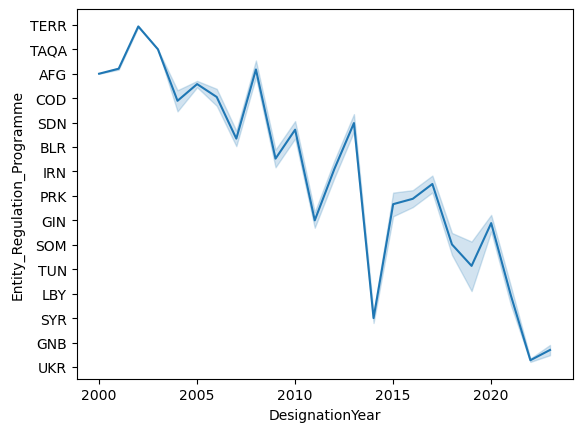

In [79]:
plot1=sns.lineplot(data=df,y="Entity_Regulation_Programme",x="DesignationYear")

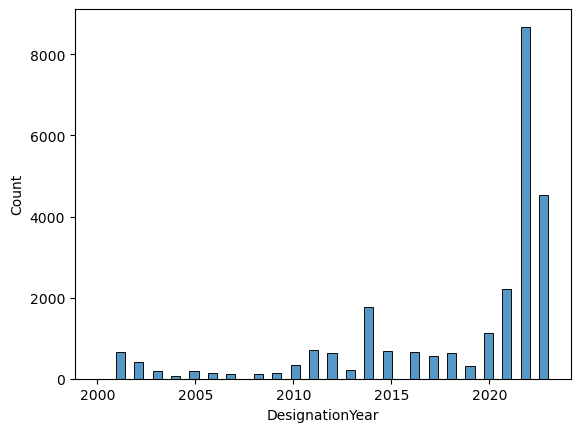

In [66]:
plot2 = sns.histplot(df.DesignationYear)

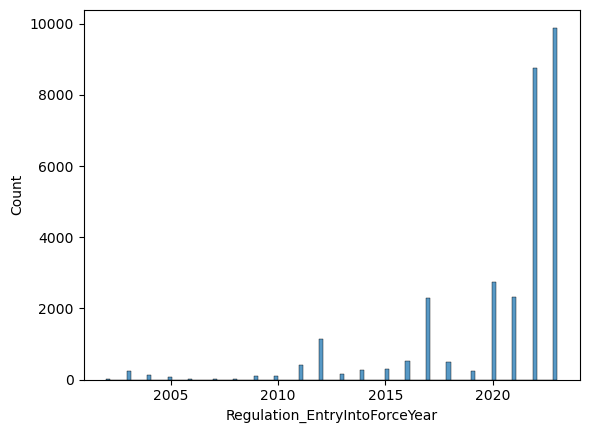

In [65]:
plot2 = sns.histplot(df.Regulation_EntryIntoForceYear)

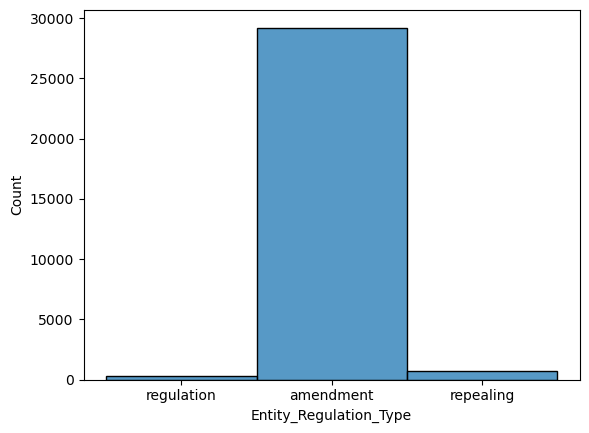

In [67]:
plot4=sns.histplot(df.Entity_Regulation_Type)

**Create final dataset**

In [ ]:
#filter to only retrieve variables needed

#change dtypes

#rename columns
